## TODOs

* remove up until age 7 from dataset
* correct mislabeled or filenames that don't have labels?
* show_top_losses -> some labels don't register

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import fastai
from fastai.vision import *

from torchvision import models
from visualization.modules import LayeredModule, get_nested_layers
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [37]:
path = Path("/home/jupyter/fai-berlin-faces/cropped/")
! rm "/home/jupyter/fai-berlin-faces/cropped/61_1_20170109142408075.jpg.chip.jpg"
! rm "/home/jupyter/fai-berlin-faces/cropped/61_3_20170109150557335.jpg.chip.jpg"

rm: cannot remove '/home/jupyter/fai-berlin-faces/cropped/61_1_20170109142408075.jpg.chip.jpg': No such file or directory
rm: cannot remove '/home/jupyter/fai-berlin-faces/cropped/61_3_20170109150557335.jpg.chip.jpg': No such file or directory


In [32]:
verify_images(path, recurse=True)


In [43]:
def isFemale(path): return bool(int(path.name.split('_')[1]))

def get_gender(path):
    print(path, "path here")
    return "female" if isFemale(path) else "male"


In [44]:
len([get_gender(p) for p in path.iterdir()])

/home/jupyter/fai-berlin-faces/cropped/2_1_2_20161219212017166.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/63_0_0_20170111201901467.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/33_1_3_20170104223525079.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/49_1_0_20170104235655316.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/25_1_0_20170103182309849.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/27_0_0_20170103182122389.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/30_1_0_20170104165921257.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/18_1_4_20170103234101020.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/26_1_3_20170104222855375.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/1_0_2_20161219155902022.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/62_0_0_20170111193832899.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/19_1_4

/home/jupyter/fai-berlin-faces/cropped/1_0_4_20170103210958819.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/13_1_0_20170110224453650.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/4_1_0_20170109192828745.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/3_1_0_20170109194247387.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/26_1_4_20170103230455729.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/24_1_2_20170104234618170.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/65_1_0_20170110160643938.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/17_0_4_20170103212532692.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/54_0_0_20170104212522653.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/4_0_0_20161219204117636.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/18_1_0_20170109213623055.jpg.chip.jpg path here
/home/jupyter/fai-berlin-faces/cropped/54_0_0_2

IndexError: list index out of range

In [16]:
tfms = get_transforms()


In [17]:
data = ( ImageList.from_folder(path) \
           # .filter_by_func() \
            .split_by_rand_pct(0.2) \
            .label_from_func(get_gender) \
            .transform(tfms) \
            .databunch() \
            .normalize(imagenet_stats) )

In [18]:
learner = cnn_learner(data, models.vgg19, metrics=[accuracy])

In [20]:
learner.freeze()

In [21]:
learner.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.768388,0.530714,0.788235,01:02
1,0.630429,0.403057,0.812788,00:56


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


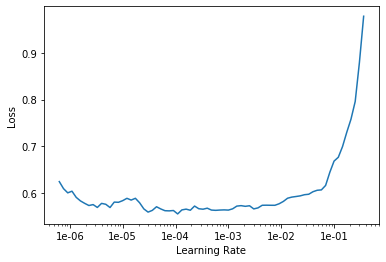

In [22]:
learner.lr_find()
learner.recorder.plot()

In [23]:
learner.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.550666,0.411909,0.807161,00:56
1,0.509577,0.387575,0.812788,00:57


1829 misclassified samples over 1955 samples in the validation set.


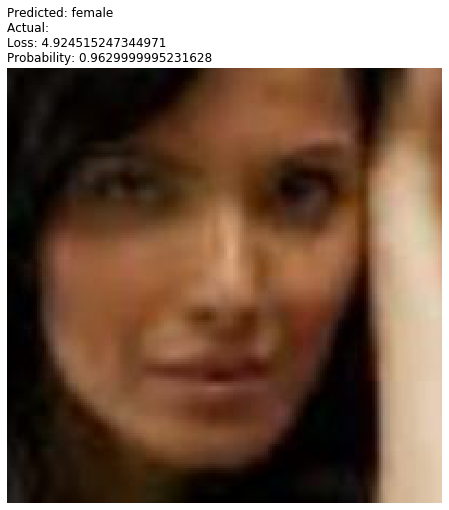

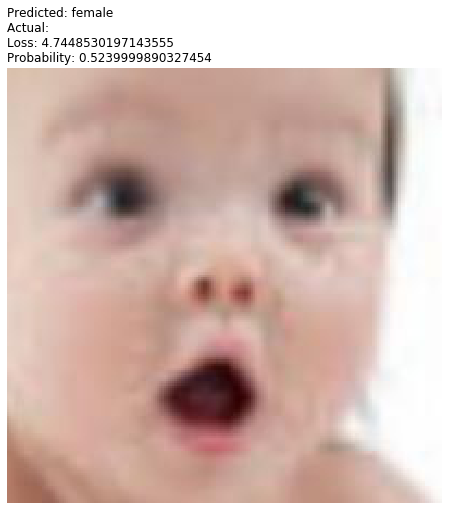

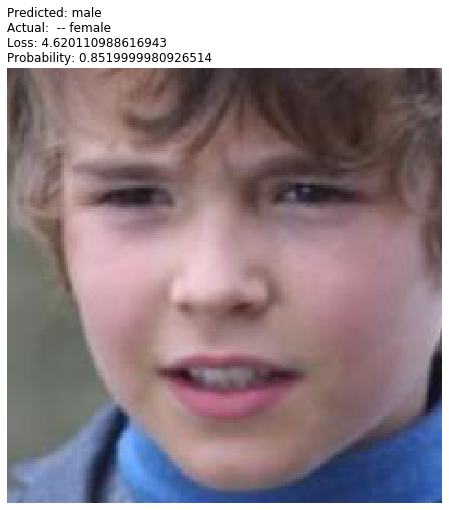

In [24]:
#did they change that API ? It was easier previously
'''
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)
'''
interp = learner.interpret()
interp.top_losses()
interp.plot_multi_top_losses()

TypeError: 'NoneType' object is not subscriptable

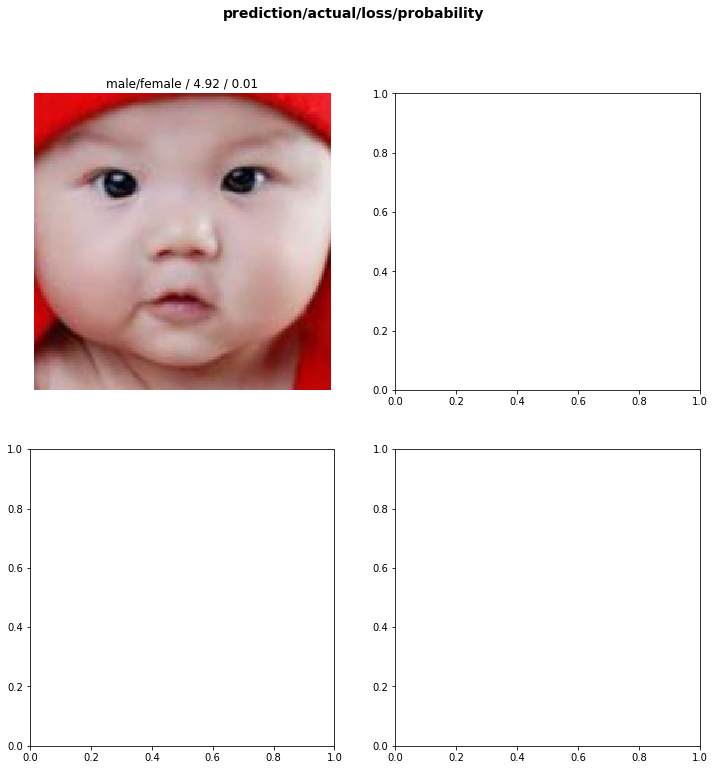

In [27]:
interp.plot_top_losses(4, heatmap=True)